<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/GlobalTempratures.csv')

# Show the first 5 rows
df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check data types and non-null counts
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


,0
dt,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12
LandMaxTemperature,1200
LandMaxTemperatureUncertainty,1200
LandMinTemperature,1200
LandMinTemperatureUncertainty,1200
LandAndOceanAverageTemperature,1200
LandAndOceanAverageTemperatureUncertainty,1200


In [4]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert 'dt' with mixed format handling
#imp
df['dt'] = pd.to_datetime(df['dt'], format='mixed', dayfirst=True, errors='coerce')

# Check if any dates failed to convert
print(df['dt'].isna().sum(), "dates could not be converted.")


0 dates could not be converted.


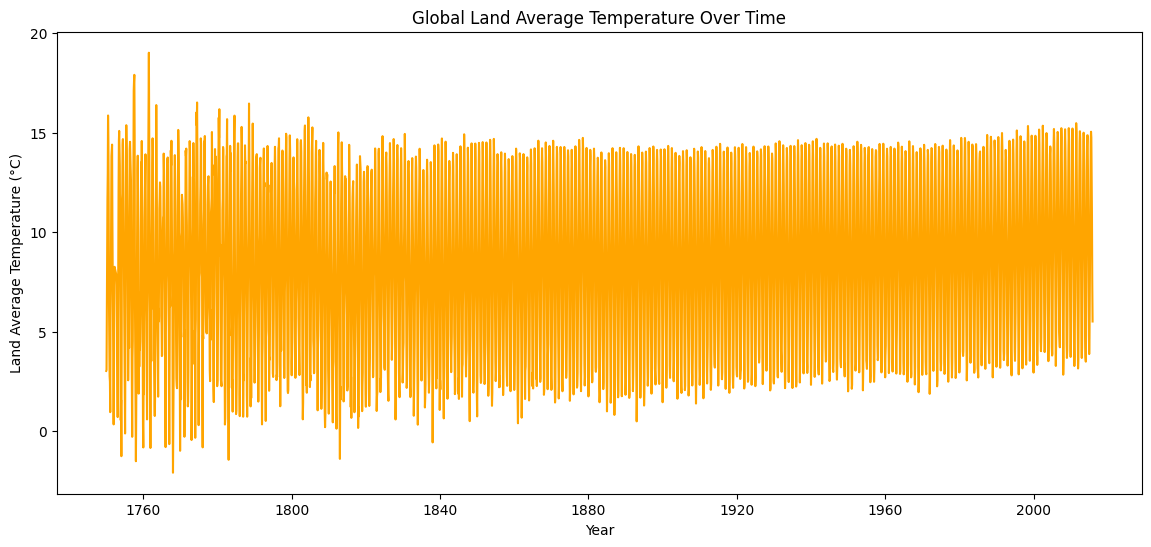

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(x='dt', y='LandAverageTemperature', data=df, color='orange')
plt.title('Global Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.show()


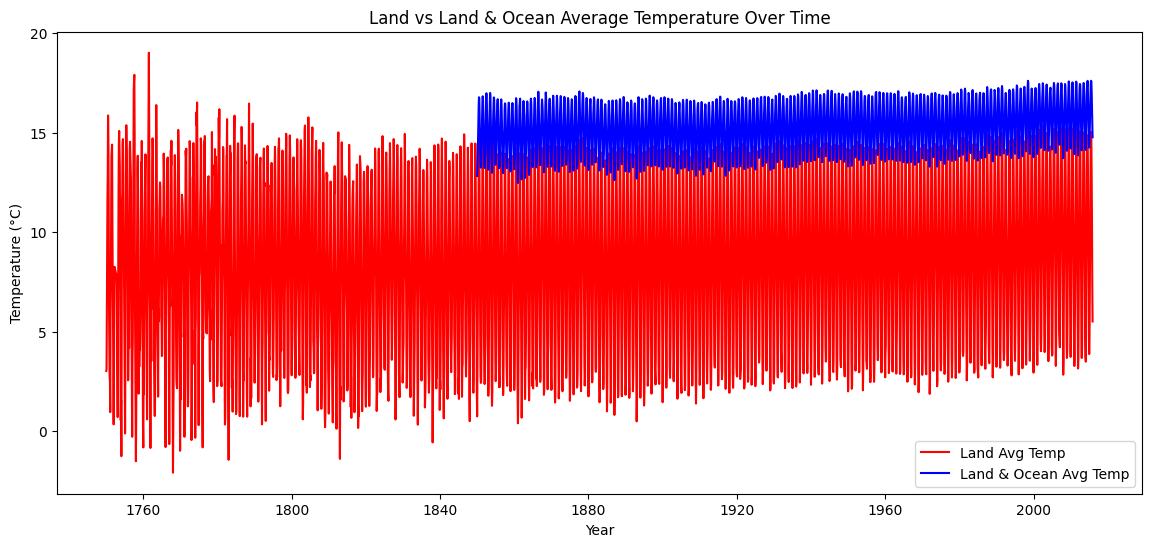

In [7]:
plt.figure(figsize=(14,6))
sns.lineplot(x='dt', y='LandAverageTemperature', data=df, label='Land Avg Temp', color='red')
sns.lineplot(x='dt', y='LandAndOceanAverageTemperature', data=df, label='Land & Ocean Avg Temp', color='blue')
plt.title('Land vs Land & Ocean Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


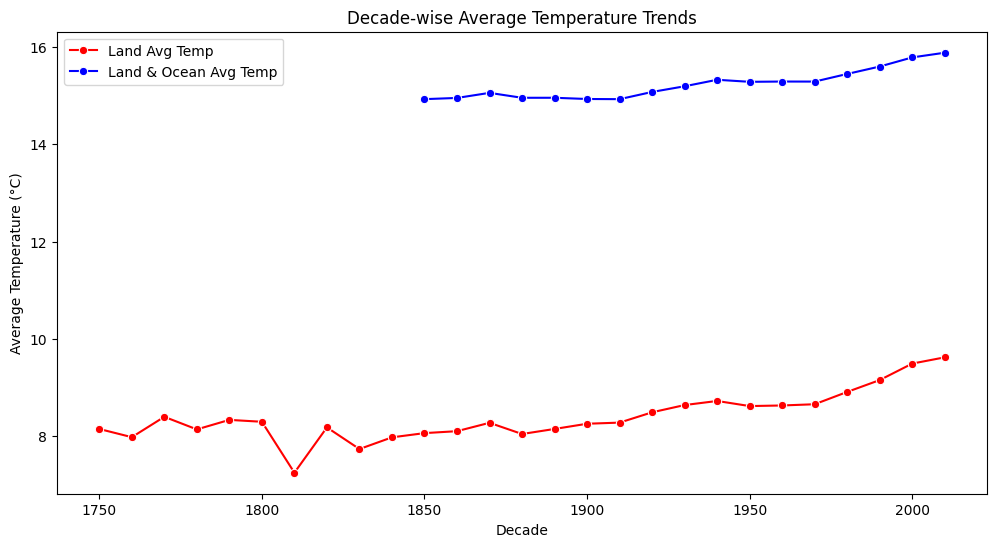

In [8]:
# Create a 'Decade' column
df['Decade'] = (df['dt'].dt.year // 10) * 10

# Group by Decade and calculate mean temperature
decade_avg = df.groupby('Decade')[['LandAverageTemperature', 'LandAndOceanAverageTemperature']].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='Decade', y='LandAverageTemperature', data=decade_avg, marker='o', label='Land Avg Temp', color='red')
sns.lineplot(x='Decade', y='LandAndOceanAverageTemperature', data=decade_avg, marker='o', label='Land & Ocean Avg Temp', color='blue')
plt.title('Decade-wise Average Temperature Trends')
plt.xlabel('Decade')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()


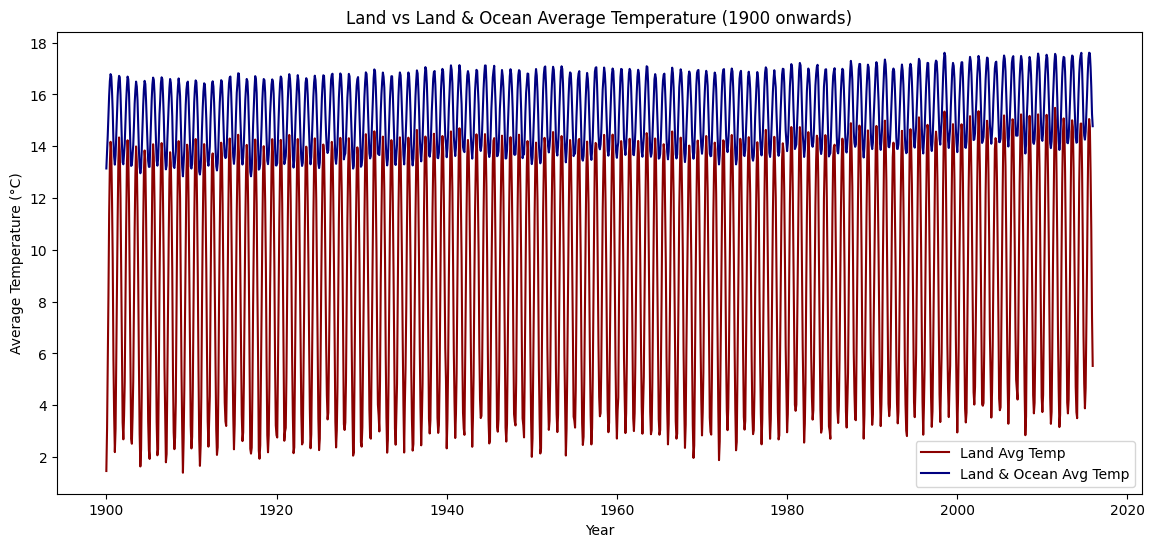

In [9]:
# Filter data from 1900 onwards
recent_df = df[df['dt'].dt.year >= 1900]

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(x='dt', y='LandAverageTemperature', data=recent_df, label='Land Avg Temp', color='darkred')
sns.lineplot(x='dt', y='LandAndOceanAverageTemperature', data=recent_df, label='Land & Ocean Avg Temp', color='navy')
plt.title('Land vs Land & Ocean Average Temperature (1900 onwards)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()
